In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
#@title 24C5 means a convolution layer with 24 feature maps using a 5x5 filter and stride 1 ............................................................................  24C5S2 means a convolution layer with 24 feature maps using a 5x5 filter and stride 2........................ P2 means max pooling using 2x2 filter and stride 2 .........256 means fully connected dense layer with 256 units


In [5]:
!unzip /content/test.csv.zip

Archive:  /content/test.csv.zip
  inflating: test.csv                


In [6]:
!unzip /content/train.csv.zip

Archive:  /content/train.csv.zip
  inflating: train.csv               


In [7]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [8]:
from keras.utils.np_utils import to_categorical

In [9]:
y_train = train['label']
X_train = train.drop(labels='label',axis=1)
X_train = X_train / 255.0
test = test / 255.0
X_train = X_train.values.reshape(-1,28,28,1)
test =test.values.reshape(-1,28,28,1)
y_train = to_categorical(y_train,num_classes=10)
anealer = keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

In [10]:
def plot_counts(y_train):
  sns.countplot(y_train)
  y_train.value_counts()

#1. How many convolution-subsambling pairs?

###Experiment # 1

In [11]:
nets = 3
model = [0]*nets
model

[0, 0, 0]

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
epochs=20

CNN (C-P)x1: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.98802
CNN (C-P)x2: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99141
CNN (C-P)x3: Epochs=20, Train accuracy=0.99986, Validation accuracy=0.99149


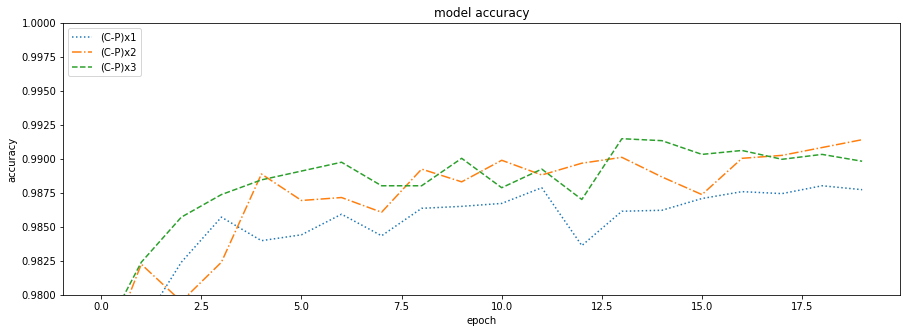

In [ ]:
def ExperimentSubSampling(X_train,y_train,nets=3,filter1=24,filter2=48,filter3=64,kernel_size=5,batch_size=80,epochs=20):
  model = [0]*nets
  for j in range(3):
    model[j] = keras.models.Sequential()
    model[j].add(keras.layers.Conv2D(filter1,kernel_size=kernel_size,padding='same',activation='relu',input_shape=(28,28,1)))
    model[j].add(keras.layers.MaxPool2D())
    if j > 0:
      model[j].add(keras.layers.Conv2D(filter2,kernel_size=kernel_size,padding='same',activation='relu'))
      model[j].add(keras.layers.MaxPool2D())
    if j > 1:
      model[j].add(keras.layers.Conv2D(filter3,kernel_size=kernel_size,padding='same',activation='relu'))
      model[j].add(keras.layers.MaxPool2D(padding='same'))
    model[j].add(keras.layers.Flatten())
    model[j].add(keras.layers.Dense(256,activation='relu'))
    model[j].add(keras.layers.Dense(10,activation='softmax'))
    model[j].compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  history = [0]*nets
  from sklearn.model_selection import train_test_split
  X_train2,X_val2,y_train2,y_val2=train_test_split(X_train,y_train,test_size=0.33,random_state=42)
  names = ["(C-P)x1","(C-P)x2","(C-P)x3"]
  for j in range(nets):
    history[j] = model[j].fit(X_train2,y_train2,batch_size=batch_size,epochs=epochs,validation_data=(X_val2,y_val2),callbacks=[anealer],verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))
  plt.figure(figsize=(15,5))
  for i in range(nets):
      plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(names, loc='upper left')
  axes = plt.gca()
  axes.set_ylim([0.98,1])
  plt.show()
  return history,model

    
history,model = ExperimentSubSampling(X_train,y_train,nets=3,filter1=24,filter2=48,filter3=64,kernel_size=5,batch_size=80,epochs=20)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
history = [0]*nets
X_train2,y_train2,X_valid,y_valid=train_test_split(X_train,y_train,test_size=0.33,random_state=42)
names = ["(C-P)x1","(C-P)x2","(C-P)x3"]
epochs =20
for j in range(nets):
  history[j] = model[j].fit(X_train2,y_train2,batch_size=80,epochs=epochs,validation_data=(X_valid,y_valid),callbacks=[annealer],verbose=0)
   print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
       names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

   

In [ ]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

#2. How many feature maps?

###Experiment # 2

In [ ]:
nets = 6
model = [0]*nets
for j in range(nets):
  model[j] = keras.models.Sequential()
  model[j].add(keras.layers.Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
  model[j].add(keras.layers.MaxPool2D())
  model[j].add(keras.layers.Conv2D(j*16+16,kernel_size=5,activation='relu'))
  model[j].add(keras.layers.MaxPool2D())
  model[j].add(Flatten())
  model[j].add(Dense(256, activation='relu'))
  model[j].add(Dense(10, activation='softmax'))
  model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))

# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

CNN 8 maps: Epochs=20, Train accuracy=0.99954, Validation accuracy=0.98749
CNN 16 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.98956
CNN 24 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99028
CNN 32 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99013
CNN 48 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99106
CNN 64 maps: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99113


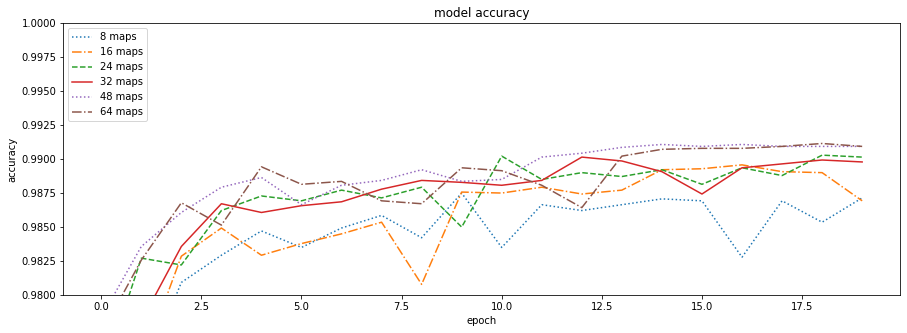

In [ ]:
def ExperimentFeatureMaps(X_train,y_train,epochs=20):
  nets = 6
  model = [0]*nets
  for j in range(nets):
    model[j] = keras.models.Sequential()
    model[j].add(keras.layers.Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(keras.layers.MaxPool2D())
    model[j].add(keras.layers.Conv2D(j*16+16,kernel_size=5,activation='relu'))
    model[j].add(keras.layers.MaxPool2D())
    model[j].add(keras.layers.Flatten())
    model[j].add(keras.layers.Dense(256, activation='relu'))
    model[j].add(keras.layers.Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

  X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size = 0.333)
  # TRAIN NETWORKS
  history = [0] * nets
  names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
  epochs = 20
  for j in range(nets):
      history[j] = model[j].fit(X_train2,y_train2, batch_size=80, epochs = epochs, 
          validation_data = (X_val2,y_val2), callbacks=[anealer], verbose=0)
      print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
          names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

  # PLOT ACCURACIES
  plt.figure(figsize=(15,5))
  for i in range(nets):
      plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(names, loc='upper left')
  axes = plt.gca()
  axes.set_ylim([0.98,1])
  plt.show()
  return history,model


history1,model1 = ExperimentFeatureMaps(X_train,y_train,epochs=20)

#3. How large a dense layer?

In [ ]:
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
epochs = 20
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))




# PLOT ACCURACIES
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

CNN 0N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.98827
CNN 32N: Epochs=20, Train accuracy=0.99989, Validation accuracy=0.98949
CNN 64N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.98949
CNN 128N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.98985
CNN 256N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99013
CNN 512N: Epochs=20, Train accuracy=0.99996, Validation accuracy=0.99142
CNN 1024N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.99106
CNN 2048N: Epochs=20, Train accuracy=1.00000, Validation accuracy=0.98992


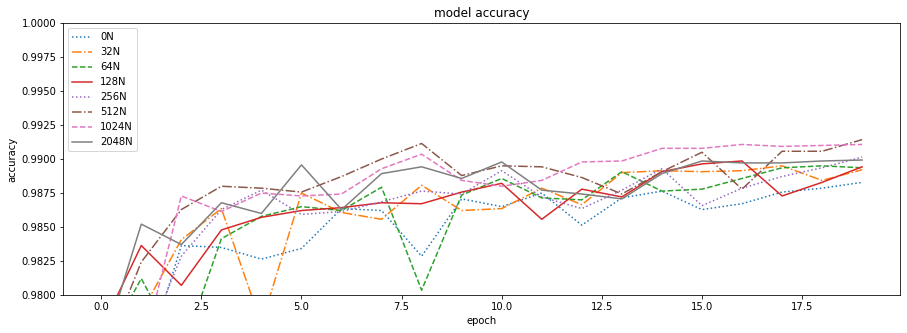

In [ ]:
def ExperimentDenseLayer(X_train,y_train,epochs=20):
  nets = 8
  model = [0] *nets

  for j in range(8):
      model[j] = keras.models.Sequential()
      model[j].add(keras.layers.Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
      model[j].add(keras.layers.MaxPool2D())
      model[j].add(keras.layers.Conv2D(64,kernel_size=5,activation='relu'))
      model[j].add(keras.layers.MaxPool2D())
      model[j].add(keras.layers.Flatten())
      if j>0:
          model[j].add(keras.layers.Dense(2**(j+4), activation='relu'))
      model[j].add(keras.layers.Dense(10, activation='softmax'))
      model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


  X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size = 0.333)
  # TRAIN NETWORKS
  history = [0] * nets
  names = ["0N","32N","64N","128N","256N","512N","1024N","2048N"]
  epochs = 20
  for j in range(nets):
      history[j] = model[j].fit(X_train2,y_train2, batch_size=80, epochs = epochs, 
          validation_data = (X_val2,y_val2), callbacks=[anealer], verbose=0)
      print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
          names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))




  # PLOT ACCURACIES
  plt.figure(figsize=(15,5))
  for i in range(nets):
      plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(names, loc='upper left')
  axes = plt.gca()
  axes.set_ylim([0.98,1])
  plt.show()
  return history,model
history2,model2 = ExperimentDenseLayer(X_train,y_train,epochs=20)

In [ ]:
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(64,kernel_size=5,activation='relu'))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(10, activation='softmax'))
    model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# CREATE VALIDATION SET
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size = 0.333)
# TRAIN NETWORKS
history = [0] * nets
names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
epochs = 30
for j in range(nets):
    history[j] = model[j].fit(X_train2,Y_train2, batch_size=80, epochs = epochs, 
        validation_data = (X_val2,Y_val2), callbacks=[annealer], verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],epochs,max(history[j].history['acc']),max(history[j].history['val_acc']) ))
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_acc'],linestyle=styles[i])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()


CNN D=0: Epochs=30, Train accuracy=1.00000, Validation accuracy=0.99013
CNN D=0.1: Epochs=30, Train accuracy=0.99954, Validation accuracy=0.99113
CNN D=0.2: Epochs=30, Train accuracy=0.99907, Validation accuracy=0.99235
CNN D=0.3: Epochs=30, Train accuracy=0.99789, Validation accuracy=0.99228
CNN D=0.4: Epochs=30, Train accuracy=0.99415, Validation accuracy=0.99328
CNN D=0.5: Epochs=30, Train accuracy=0.98990, Validation accuracy=0.99285
CNN D=0.6: Epochs=30, Train accuracy=0.98069, Validation accuracy=0.99113
CNN D=0.7: Epochs=30, Train accuracy=0.96630, Validation accuracy=0.98863


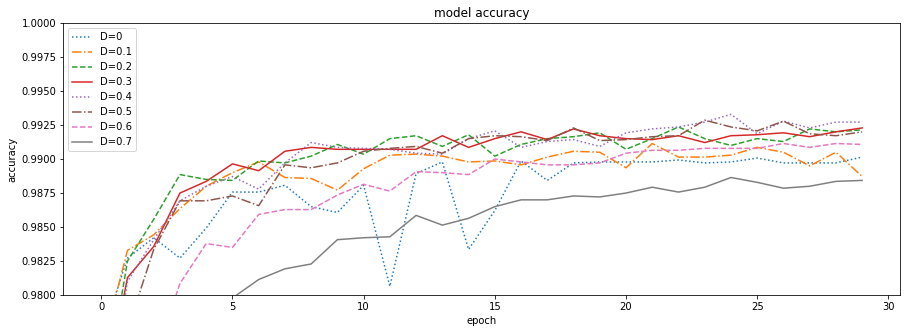

TypeError: ignored

In [ ]:
def ExperimentDropout(X_train,y_train,epochs=20):
  nets = 8
  model = [0] *nets

  for j in range(8):
      model[j] = keras.models.Sequential()
      model[j].add(keras.layers.Conv2D(32,kernel_size=5,activation='relu',input_shape=(28,28,1)))
      model[j].add(keras.layers.MaxPool2D())
      model[j].add(keras.layers.Dropout(j*0.1))
      model[j].add(keras.layers.Conv2D(64,kernel_size=5,activation='relu'))
      model[j].add(keras.layers.MaxPool2D())
      model[j].add(keras.layers.Dropout(j*0.1))
      model[j].add(keras.layers.Flatten())
      model[j].add(keras.layers.Dense(128, activation='relu'))
      model[j].add(keras.layers.Dropout(j*0.1))
      model[j].add(keras.layers.Dense(10, activation='softmax'))
      model[j].compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

  # CREATE VALIDATION SET
  X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size = 0.333)
  # TRAIN NETWORKS
  history = [0] * nets
  names = ["D=0","D=0.1","D=0.2","D=0.3","D=0.4","D=0.5","D=0.6","D=0.7"]
  epochs = 30
  for j in range(nets):
      history[j] = model[j].fit(X_train2,y_train2, batch_size=80, epochs = epochs, 
          validation_data = (X_val2,y_val2), callbacks=[anealer], verbose=0)
      print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
          names[j],epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))
  plt.figure(figsize=(15,5))
  for i in range(nets):
      plt.plot(history[i].history['val_accuracy'],linestyle=styles[i])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(names, loc='upper left')
  axes = plt.gca()
  axes.set_ylim([0.98,1])
  plt.show()

history3,model3 = ExperimentDropout(X_train,y_train,epochs=20)